# Problem Statement: 

“Who will subscribe to the term deposit?”

A Portuguese Banking Institution needs to understand which of their existing customers are most likely to invest in a term deposit. They launched a tele-marketing campaign to run an experiment on approx.. 41000 customers and analyse the differences between the ones who do opt for a TD and the ones who do not. 


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,plot_roc_curve,roc_auc_score,plot_confusion_matrix,classification_report,cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
import xgboost as xgb

In [14]:
df=pd.read_csv(r"C:\T Gushpu\bank-dataset.csv")

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.shape

(41188, 20)

## Tasks:

•	Apply data cleaning and/pre-processing techniques, if necessary.

•	Apply normalization technique, if needed, wherever applicable.

•	Check if the dataset is imbalanced. If required, apply the appropriate technique.

•	Use Hyperparameter tuning if required.

•	Compute appropriate evaluation metrics. 

•	Display confusion matrix

•	Draw ROC curve

•	Compare the performance of the models.


## Apply following classification algorithms:

•	Logistic Regression

•	KNN with suitable K

•	Decision Tree 

•	Random Forest

•	AdaBoost

•	Gradient Boost

•	XGBoost


In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Target variable

y - has the client subscribed a term deposit? (binary: 'yes','no')

In [42]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
df.duplicated().sum()

2103

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='y', ylabel='count'>

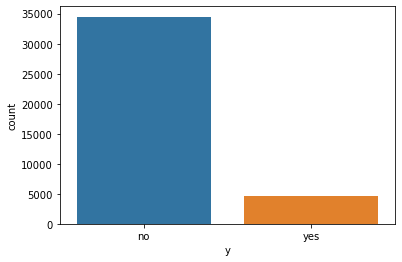

In [46]:
sns.countplot(x='y',data=df)

In [47]:
df.y.value_counts()

no     34489
yes     4596
Name: y, dtype: int64

## INSIGHTS

 From the above plot we conclude that y- client data is imbalanced and indicates that most of the customers are not subscribed to the term deposit.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39085.0,40.122579,10.475910,17.000,32.000,38.000,47.000,98.000
campaign,39085.0,2.627325,2.823092,1.000,1.000,2.000,3.000,56.000
pdays,39085.0,960.561213,191.554022,0.000,999.000,999.000,999.000,999.000
previous,39085.0,0.179992,0.504832,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39085.0,0.058160,1.579310,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39085.0,93.576412,0.584716,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,39085.0,-40.509285,4.649560,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39085.0,3.594486,1.744720,0.634,1.334,4.857,4.961,5.045
nr.employed,39085.0,5165.737262,72.919772,4963.600,5099.100,5191.000,5228.100,5228.100


## INSIGHTS:

1)For an average of an older customers may be more likely to invest in term deposits as they tend to be more risk-averse and prefer stability in their investments.

2)campaign is number of times the bank contacts a customer about a term deposit which doesn't impacted their likelihood of subscribing as with average(2.5) and standard deviation of 2.7.

3)pdays is number of days since the customer was last contacted about a term deposit is influencing their likelihood of subscribing.

4)Also number of previous contacts the bank has had with the customer may influence their likelihood of subscribing.

5)The employment variation rate may influence customers' financial stability and their likelihood of investing in term deposits.

6)The consumer price index may influence customers' financial decisions and their likelihood of investing in term deposits.

7)The consumer confidence index may also influence customers' financial decisions and their likelihood of investing in term deposits.

8)The 3-month Euro Interbank Offered Rate may influence customers' financial decisions and their likelihood of investing in term deposits.

9)The number of employed individuals in the economy may influence customers' financial decisions and their likelihood of investing in term deposits.
           

## Feature encoding: 

This involves converting categorical features into numerical features that can be used for analysis. 

For example, the 'job' and 'marital' columns can be encoded using one-hot encoding.

In [20]:
le = LabelEncoder()
for i in ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,1,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,1,1,6,1,0,26,0,1,8,18,16,287,8,0


## Feature scaling:

This involves scaling numerical features to have similar ranges, which can prevent model bias towards certain features.

For example, the 'age' column can be normalized using min-max scaling.

In [22]:
sc=StandardScaler()
for i in ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    df[i]=sc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.516018,-0.184282,-0.274565,-1.779887,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664,0
1,1.611497,0.943864,-0.274565,-0.337588,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664,0
2,-0.298099,0.943864,-0.274565,-0.337588,-0.008761,0.933893,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664,0
3,-0.011660,-1.030391,-0.274565,-1.299120,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664,0
4,1.516018,0.943864,-0.274565,-0.337588,-0.008761,-1.070787,2.310583,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664,0


## Data normalization:

This involves scaling the features to have zero mean and unit variance, which can improve model performance. 

For example, the 'campaign' column can be normalized using z-score normalization.

<AxesSubplot:ylabel='campaign'>

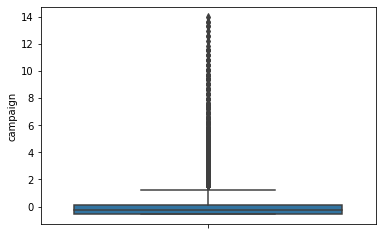

In [54]:
sns.boxplot(y='campaign',data=df)

In [55]:
df1 = df.copy()
upper = df1['campaign'].mean() + (3*df1['campaign'].std())
lower = df1['campaign'].mean() - (3*df1['campaign'].std())

In [56]:
df1[(df1['campaign']> upper) | (df1['campaign']<lower)].shape[0]

691

### Capping outlier

In [57]:
max1 = df1['campaign'].quantile(0.90) 
min1 = df1['campaign'].quantile(0.01)

In [58]:
df1['campaign'] = np.clip(df1['campaign'],min1,max1)

<AxesSubplot:ylabel='campaign'>

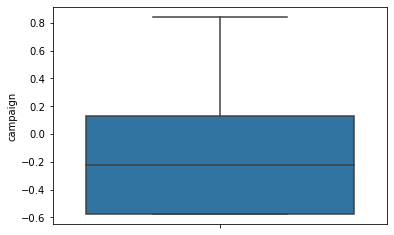

In [59]:
sns.boxplot(y='campaign',data=df1)

In [24]:
x=df.drop('y',axis=1) 
y=df['y'] 

In [25]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.516018,-0.184282,-0.274565,-1.779887,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664
1,1.611497,0.943864,-0.274565,-0.337588,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664
2,-0.298099,0.943864,-0.274565,-0.337588,-0.008761,0.933893,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664
3,-0.011660,-1.030391,-0.274565,-1.299120,-0.008761,-1.070787,-0.432791,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664
4,1.516018,0.943864,-0.274565,-0.337588,-0.008761,-1.070787,2.310583,1.296145,0.752108,-0.712712,-0.578552,0.196994,-0.356544,0.193572,0.517283,0.674728,0.946381,0.468799,0.080664


# Model Building

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [27]:
xtrain.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16354,-0.584539,-0.748355,-0.274565,-0.818354,-0.008761,0.933893,-0.432791,-0.771519,-0.543085,1.429974,0.844234,0.196994,-0.356544,0.193572,0.873009,0.496911,-0.722909,0.756449,0.887094
15567,1.229578,-0.748355,-0.274565,-1.779887,-0.008761,-1.070787,-0.432791,-0.771519,-0.543085,-1.426941,0.488538,0.196994,-0.356544,0.193572,0.873009,0.496911,-0.722909,0.670154,0.887094
33913,-1.061938,0.943864,-0.274565,-0.337588,-0.008761,-1.070787,2.310583,-0.771519,0.752108,1.429974,-0.222855,0.196994,1.624340,-2.512357,-1.261344,-1.103447,-1.056767,-0.681799,-0.725767
26512,-0.393579,-1.030391,-0.274565,-0.337588,-0.008761,-1.070787,-0.432791,-0.771519,1.183839,0.001517,-0.222855,0.196994,-0.356544,0.193572,0.161558,-0.569994,-0.555980,0.195532,0.483879
36529,-0.680019,-1.030391,1.378197,1.104711,-0.008761,-1.070787,-0.432791,-0.771519,-0.111354,1.429974,-0.578552,0.196994,3.605223,-2.512357,-1.617070,-0.925629,-0.222122,-0.768094,-1.128982


In [28]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')

xtrain shape(31268, 19)
xtest shape(7817, 19)


In [29]:
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

ytrain shape(31268,)
ytest shape(7817,)


In [30]:
ytrain.value_counts(normalize=True)

0    0.882404
1    0.117596
Name: y, dtype: float64

In [31]:
ytest.value_counts(normalize=True)

0    0.882436
1    0.117564
Name: y, dtype: float64

## The given dataset is Imbalanced Class problem

### Apply SMOTE to balance the data

- SMOTE (Synthetic Minority Over-sampling Technique)

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state=10)

### Before

In [38]:
print(f'Count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
print(f'Count of existing Majority class records: {xtrain[ytrain==0].shape[0]}')

Count of minority class records before upsampling: 3677
Count of existing Majority class records: 27591


In [39]:
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain,ytrain)

### After

In [40]:
print(f'Count of minority class(class 1) records after SMOTE : {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'Count of existing Majority class(class 0) records: {xtrain_smote[ytrain_smote==0].shape[0]}')

Count of minority class(class 1) records after SMOTE : 27591
Count of existing Majority class(class 0) records: 27591


In [41]:
ytrain_smote.value_counts()

0    27591
1    27591
Name: y, dtype: int64

### From this we say that:

Smote balanced the class distribution and this improves the performance of machine learning models on the minority class.

## Logistic Regression

In [188]:
log_reg=LogisticRegression()

In [189]:
model1=log_reg.fit(xtrain_smote,ytrain_smote)

In [190]:
model1.coef_

array([[-0.00926487, -0.01201263,  0.05890161,  0.11535574, -0.06362349,
        -0.03507102, -0.0265774 , -0.44242063, -0.16012955,  0.06151892,
        -0.19181185, -0.21014286, -0.08627857,  0.15512787, -0.62117522,
         0.4449426 ,  0.14915248, -0.30581495, -0.08617321]])

These coeff values indicates prob of log odd ratio

In [192]:
y_pred_prob=model1.predict_proba(xtest)

In [193]:
y_pred_prob

array([[0.66874256, 0.33125744],
       [0.75435953, 0.24564047],
       [0.61740864, 0.38259136],
       ...,
       [0.78586013, 0.21413987],
       [0.40638784, 0.59361216],
       [0.32799076, 0.67200924]])

In [194]:
y_pred_log_prob=model1.predict_log_proba(xtest)
y_pred_log_prob

array([[-0.4023561 , -1.10485945],
       [-0.2818862 , -1.40388631],
       [-0.48222417, -0.9607878 ],
       ...,
       [-0.24097646, -1.54112586],
       [-0.9004473 , -0.5215291 ],
       [-1.11476984, -0.39748319]])

In [195]:
y_pred=model1.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [196]:
accuracy_score(ytest,y_pred)

0.7734424971216579

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


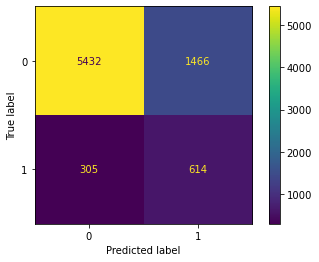

In [197]:
plot_confusion_matrix(model1,xtest,ytest)

In [198]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      6898
           1       0.30      0.67      0.41       919

    accuracy                           0.77      7817
   macro avg       0.62      0.73      0.63      7817
weighted avg       0.87      0.77      0.81      7817



C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


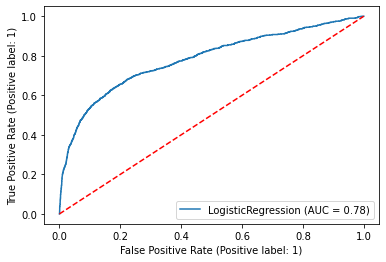

In [223]:
plot_roc_curve(model1,xtest,ytest)
plt.plot([0,1],[0,1],color='r',ls='--')  

In [202]:
roc_auc_score(ytest,y_pred)

0.7277960746850343

In [205]:
cohen_kappa_score(ytest,y_pred)

0.29440335883382707

## Insight:

The accuracy score of Logistic Regression is 77%.

## KNN with suitable K

### Implement KNN with Stratified k-fold sampling

In [226]:
knn = KNeighborsClassifier()

In [228]:
knn.fit(xtrain_smote,ytrain_smote)
y_pred = knn.predict(xtest)

In [229]:
accuracy_score(ytest,y_pred)

0.7463221184597671

In [230]:
precision_score(ytest,y_pred)

0.24881964117091596

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


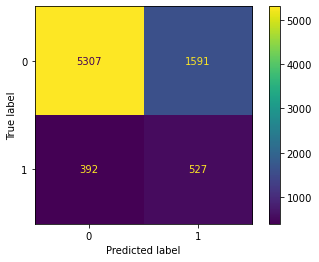

In [231]:
plot_confusion_matrix(knn,xtest,ytest)

In [232]:
confusion_matrix(ytest,y_pred)

array([[5307, 1591],
       [ 392,  527]], dtype=int64)

In [233]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      6898
           1       0.25      0.57      0.35       919

    accuracy                           0.75      7817
   macro avg       0.59      0.67      0.59      7817
weighted avg       0.85      0.75      0.78      7817



## HYPERPARAMETER TUNING - 

In [234]:
tuned_parameters = {'n_neighbors':range(3,20,2),'metric':['euclidean','minkowski']}

In [235]:
clf = GridSearchCV(knn,tuned_parameters,cv=10,scoring='roc_auc')

In [236]:
clf.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': range(3, 20, 2)},
             scoring='roc_auc')

In [237]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [238]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [239]:
clf.best_score_

0.9340574945360169

In [240]:
clf1 = KNeighborsClassifier(metric ='euclidean', n_neighbors =7)

In [241]:
clf1.fit(xtrain_smote,ytrain_smote)
ypred1 = clf1.predict(xtest)

In [242]:
precision_score(ytest,ypred1)

0.24036379385015158

In [243]:
roc_auc_score(ytest,clf1.predict_proba(xtest)[:,1])

0.7148931531777674

In [93]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6898
           1       0.42      0.57      0.48       919

    accuracy                           0.86      7817
   macro avg       0.68      0.73      0.70      7817
weighted avg       0.88      0.86      0.87      7817



## Insight:

The accuracy score for KNN Classifier is 86%.

## Decision Tree Classifier

In [73]:
clf=DecisionTreeClassifier()

In [74]:
clf.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier()

In [75]:
ytest.head()

12726    0
1573     0
21356    0
20716    0
32215    0
Name: y, dtype: int32

In [76]:
ypred=clf.predict(xtest)
ypred1=pd.DataFrame(ypred) 
ypred1

,0
0,0
1,0
2,0
3,0
4,0
...,...
7812,0
7813,0
7814,0
7815,1


In [77]:
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [88]:
list(xtrain_smote.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


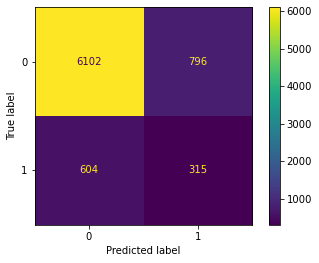

In [78]:
plot_confusion_matrix(clf,xtest,ytest)

0,0 TN -- 6135

1,1 TP -- 311

0,1 FP -- 763

1,0 FN -- 608


In [97]:
accuracy_score(ytest,ypred)

0.8319048228220545

In [251]:
clf_prob=clf.predict_proba(xtest)[:,1]

Text(0, 0.5, 'True Positive Rate')

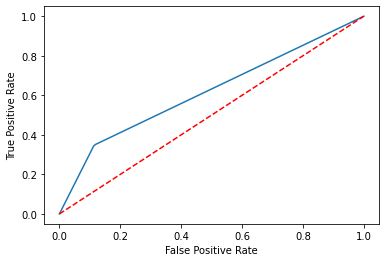

In [252]:
fpr,tpr,threshold=roc_curve(ytest,clf_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    

In [102]:
roc_auc_score(ytest,clf_prob)

0.6145070987758512

## HYPERPARAMETER TUNING - 

### GridSearchCV alogorithm for choosing best parameter which gives highest score.

In [255]:
mod = GridSearchCV(clf,param_grid = {'max_depth':[i for i in range(7,20)],'max_leaf_nodes':[i for i in range(5,15)],'min_samples_leaf':[i for i in range(10,200,5)]},cv=10)

In [256]:
mod.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                       18, 19],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100, 105, 110, 115, 120,
                                              125, 130, 135, 140, 145, 150, 155, ...]})

In [257]:
mod.best_score_

0.8420160155818763

In [258]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, min_samples_leaf=20)

In [259]:
clf_grid = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10)
clf_grid.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=10)

In [260]:
y_pred_grid= clf_grid.predict(xtest)

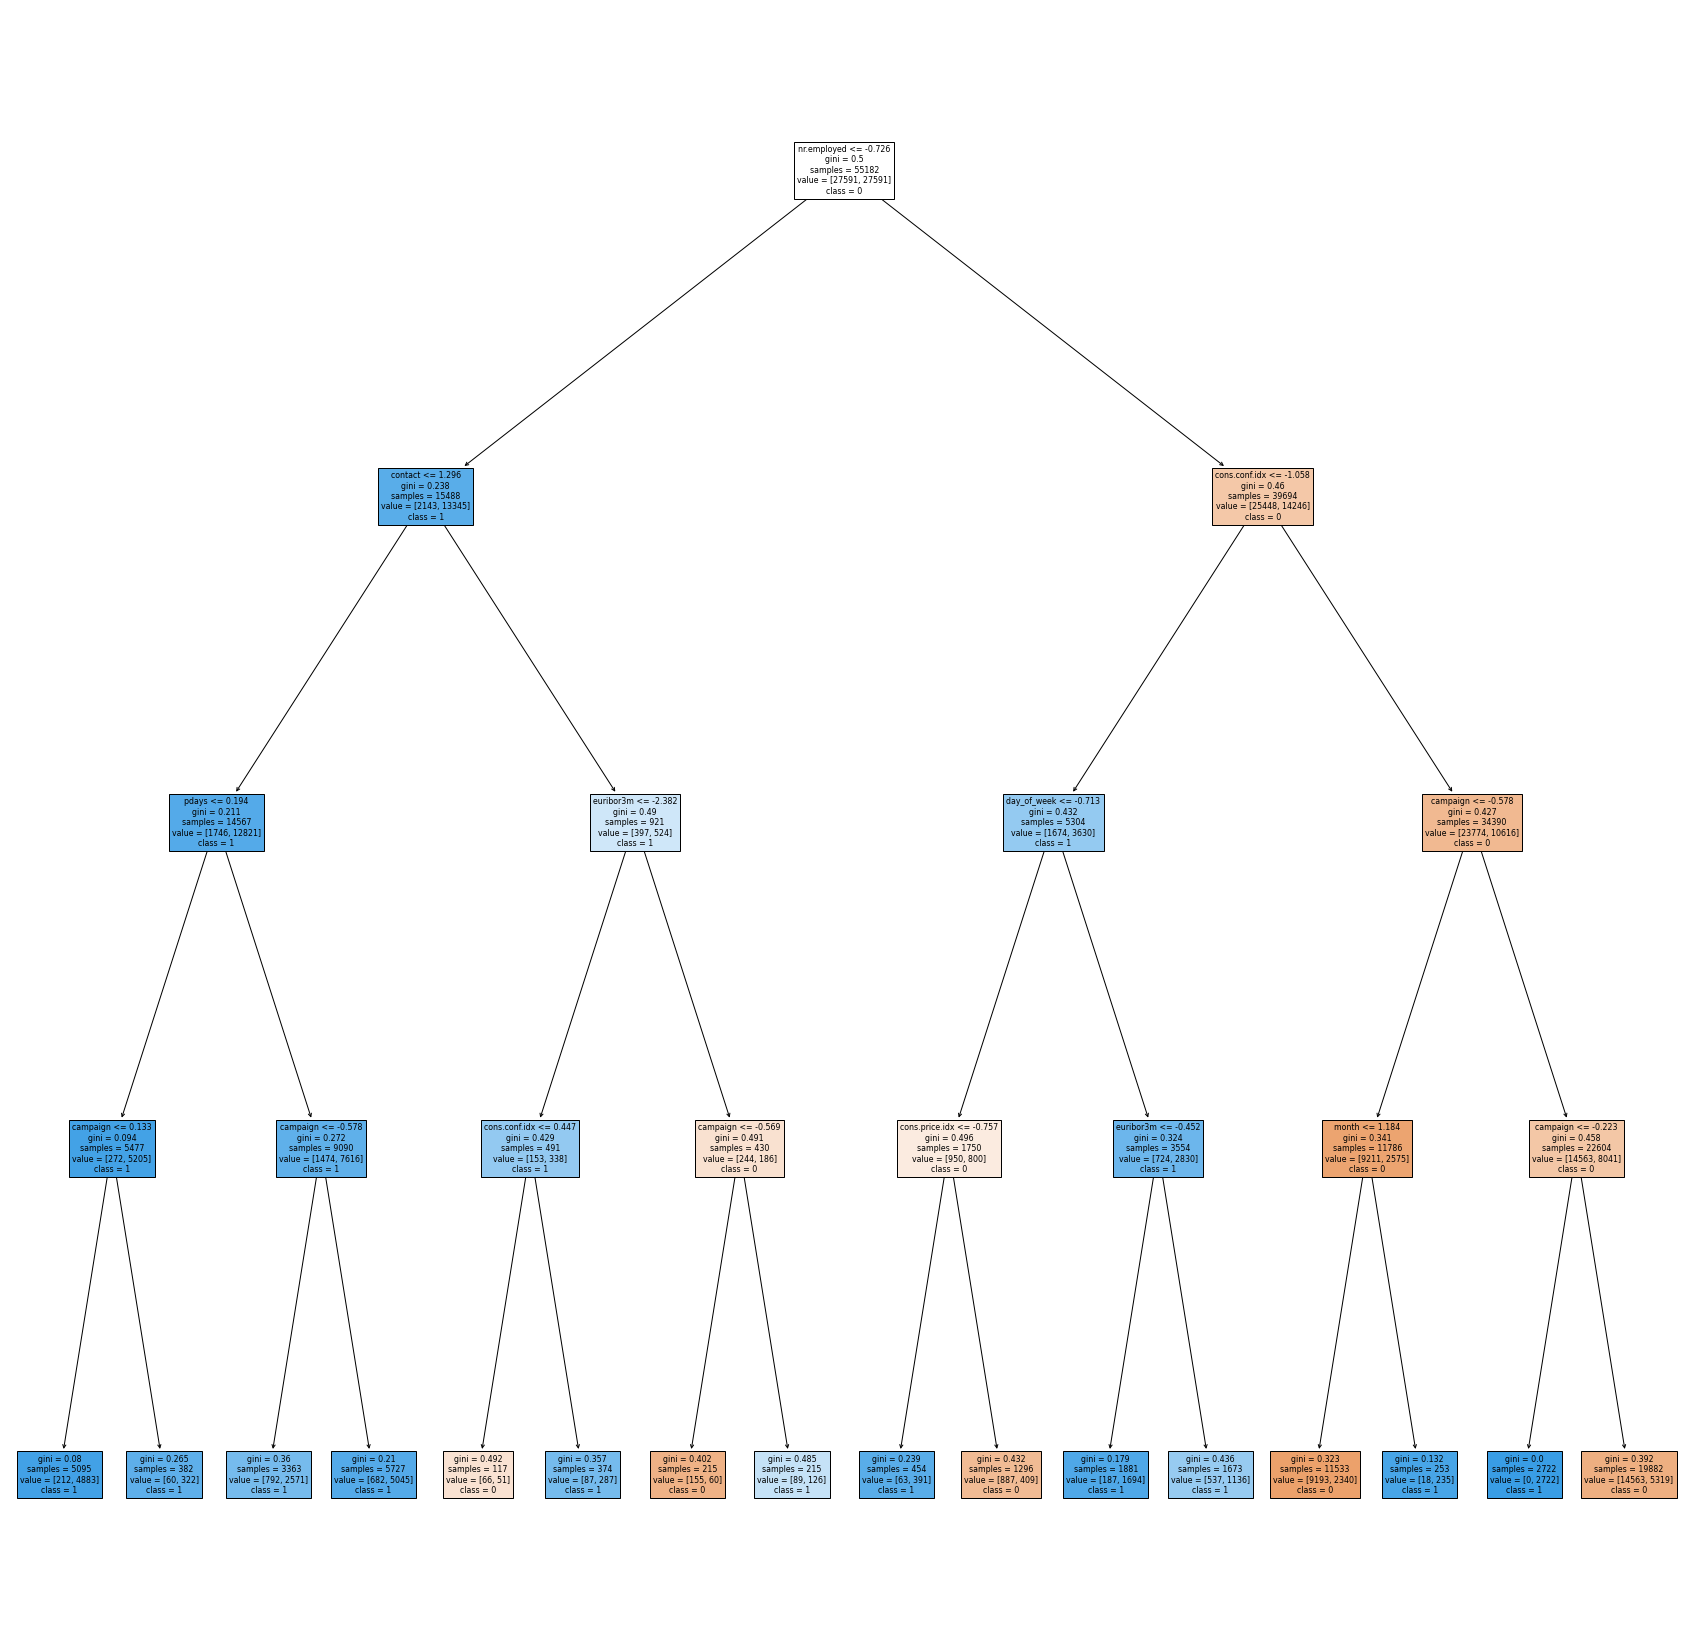

In [89]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(mod,feature_names=list(xtrain_smote.columns.values),class_names=['0','1'],filled=True);

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


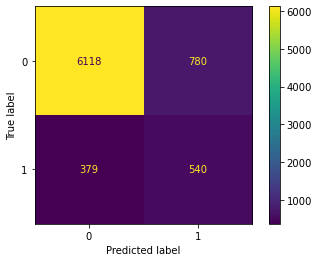

In [266]:
plot_confusion_matrix(mod,xtest,ytest)

In [261]:
accuracy_score(ytest,y_pred_grid)

0.851733401560701

In [265]:
print(classification_report(ytest,y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6898
           1       0.41      0.59      0.48       919

    accuracy                           0.85      7817
   macro avg       0.68      0.74      0.70      7817
weighted avg       0.88      0.85      0.86      7817



In [262]:
clf_prob=clf_grid.predict_proba(xtest)[:,1]

Text(0, 0.5, 'True Positive Rate')

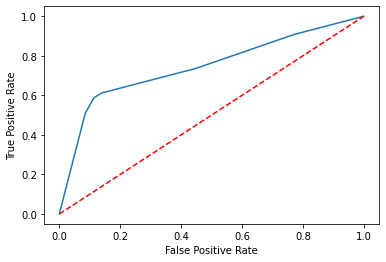

In [263]:
fpr,tpr,threshold=roc_curve(ytest,clf_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  

In [264]:
roc_auc_score(ytest,clf_grid.predict_proba(xtest)[:,1])

0.7448200594958846

## Insight:

The accuracy score of Decision Tree Classifier is 85%.

## Random Forest Classifier

In [121]:
ls=[]
for i in range(50,350,10):
    rfc=RandomForestClassifier(n_estimators=i,oob_score=True)
    rfc.fit(xtrain_smote,ytrain_smote)
    oob=rfc.oob_score_
    print(F'for n_estimators:{i},OOB_score is {oob}')
    ls.append((oob,i))

for n_estimators:50,OOB_score is 0.9362835707295857
for n_estimators:60,OOB_score is 0.9361567177702874
for n_estimators:70,OOB_score is 0.9357942807437207
for n_estimators:80,OOB_score is 0.9375702221738973
for n_estimators:90,OOB_score is 0.9365553984995107
for n_estimators:100,OOB_score is 0.9370265666340474
for n_estimators:110,OOB_score is 0.9372259069986589
for n_estimators:120,OOB_score is 0.9377333188358523
for n_estimators:130,OOB_score is 0.937117175890689
for n_estimators:140,OOB_score is 0.9381319995650755
for n_estimators:150,OOB_score is 0.9374071255119423
for n_estimators:160,OOB_score is 0.9386937769562539
for n_estimators:170,OOB_score is 0.937715196984524
for n_estimators:180,OOB_score is 0.9383132180783589
for n_estimators:190,OOB_score is 0.9381319995650755
for n_estimators:200,OOB_score is 0.9381319995650755
for n_estimators:210,OOB_score is 0.9381138777137472
for n_estimators:220,OOB_score is 0.9381682432677322
for n_estimators:230,OOB_score is 0.9376970751331956


In [122]:
max(ls)

(0.9387300206589105, 270)

In [123]:
rfc=RandomForestClassifier(n_estimators=270,oob_score=True)

In [124]:
rfc.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(n_estimators=270, oob_score=True)

In [125]:
ypred=rfc.predict(xtest)

In [126]:
accuracy_score(ytest,ypred)

0.8791096328514776

In [127]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6898
           1       0.48      0.37      0.42       919

    accuracy                           0.88      7817
   macro avg       0.70      0.66      0.68      7817
weighted avg       0.87      0.88      0.87      7817



In [129]:
rfc_prob=rfc.predict_proba(xtest)[:,1]

Text(0, 0.5, 'True Positive Rate')

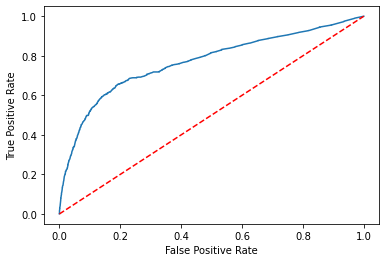

In [131]:
fpr,tpr,threshold=roc_curve(ytest,rfc_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  

In [130]:
roc_auc_score(ytest,rfc.predict_proba(xtest)[:,1])

0.7683204290972672

## HYPERPARAMETER TUNING - 

### RandomizedSearchCV alogorithm for choosing best parameter which gives highest score.

In [132]:
rf = RandomForestClassifier()

In [133]:
clf1 = RandomizedSearchCV(rf,{'n_estimators':[i for i in range(20,100)],'max_depth':[i for i in range(5,50)],'max_features':['sqrt','log2']},scoring='roc_auc')

In [134]:
clf1.fit(xtrain_smote,ytrain_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47, 48, 49, ...]},
                   scoring='roc_auc')

In [135]:
clf1.best_estimator_

RandomForestClassifier(max_depth=47, max_features='log2', n_estimators=84)

In [136]:
clf1.best_score_

0.98301036301291

In [142]:
ypred_rand = clf1.predict(xtest)

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


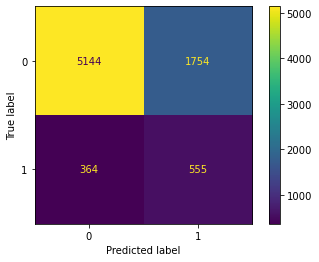

In [267]:
plot_confusion_matrix(clf1,xtest,ytest)

In [143]:
accuracy_score(ytest,ypred_rand)

0.8782141486503774

In [144]:
print(classification_report(ytest,ypred_rand))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6898
           1       0.48      0.36      0.41       919

    accuracy                           0.88      7817
   macro avg       0.70      0.65      0.67      7817
weighted avg       0.87      0.88      0.87      7817



In [147]:
clf1_prob=clf1.predict_proba(xtest)[:,1]

In [148]:
roc_auc_score(ytest,clf1.predict_proba(xtest)[:,1])

0.7682162371582055

Text(0, 0.5, 'True Positive Rate')

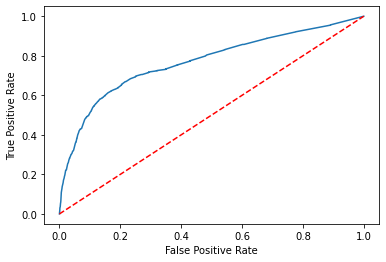

In [149]:
fpr,tpr,threshold=roc_curve(ytest,clf1_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Insight:

The accuracy score for Random Forest Classifier is 88%.

## AdaBoost Classifier

In [170]:
abc=AdaBoostClassifier(n_estimators=100)

In [171]:
abc.fit(xtrain_smote,ytrain_smote)

AdaBoostClassifier(n_estimators=100)

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


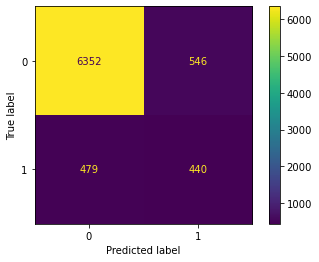

In [172]:
plot_confusion_matrix(abc,xtest,ytest)

In [215]:
ypred=abc.predict(xtest)

In [214]:
accuracy_score(ytest,ypred)

0.868875527696047

In [216]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6898
           1       0.45      0.48      0.46       919

    accuracy                           0.87      7817
   macro avg       0.69      0.70      0.69      7817
weighted avg       0.87      0.87      0.87      7817



## HYPERPARAMETER TUNING - 

### GridSearchCV alogorithm for choosing best parameter which gives highest score.

In [178]:
clf=GridSearchCV(abc,{'n_estimators':[i for i in range(50,200,10)]})

In [179]:
clf.fit(xtrain_smote,ytrain_smote)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190]})

In [210]:
ypred_rand = clf.predict(xtest)

In [211]:
accuracy_score(ytest,ypred_rand)

0.8801330433670206

In [217]:
print(classification_report(ytest,ypred_rand))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6898
           1       0.49      0.45      0.47       919

    accuracy                           0.88      7817
   macro avg       0.71      0.69      0.70      7817
weighted avg       0.88      0.88      0.88      7817



In [206]:
clf_prob=clf.predict_proba(xtest)[:,1]

Text(0, 0.5, 'True Positive Rate')

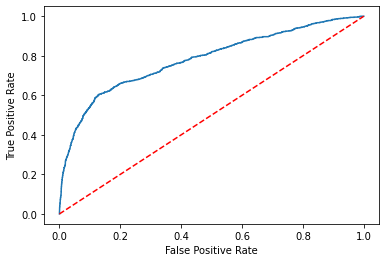

In [219]:
fpr,tpr,threshold=roc_curve(ytest,clf_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [208]:
roc_auc_score(ytest,clf.predict_proba(xtest)[:,1])

0.7815826195541373

## Insight:

The accuracy score for AdaBoost Classifier is 88%.

## Gradient Boosting Classifier

In [5]:
gbc = GradientBoostingClassifier(n_estimators=500,random_state=100)

In [42]:
gbc.fit(xtrain_smote,ytrain_smote)
y_pred = gbc.predict(xtest)

C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


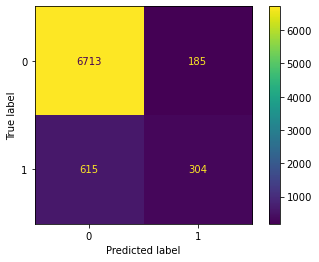

In [45]:
plot_confusion_matrix(gbc,xtest,ytest)

In [43]:
accuracy_score(ytest,y_pred)

0.8976589484456953

In [44]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6898
           1       0.62      0.33      0.43       919

    accuracy                           0.90      7817
   macro avg       0.77      0.65      0.69      7817
weighted avg       0.88      0.90      0.88      7817



## HYPERPARAMETER TUNING 

In [46]:
clf1 = RandomizedSearchCV(gbc,{'n_estimators':[i for i in range(20,100)],'max_depth':[i for i in range(5,50)],'max_features':['sqrt','log2']},scoring='roc_auc')

In [47]:
clf1.fit(xtrain_smote,ytrain_smote)

RandomizedSearchCV(estimator=GradientBoostingClassifier(n_estimators=500,
                                                        random_state=100),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 4

In [49]:
ypred = clf1.predict(xtest)

In [50]:
accuracy_score(ytest,ypred)

0.8768069591915056

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6898
           1       0.47      0.35      0.40       919

    accuracy                           0.88      7817
   macro avg       0.69      0.65      0.66      7817
weighted avg       0.86      0.88      0.87      7817



In [52]:
clf_prob=clf1.predict_proba(xtest)[:,1]

Text(0, 0.5, 'True Positive Rate')

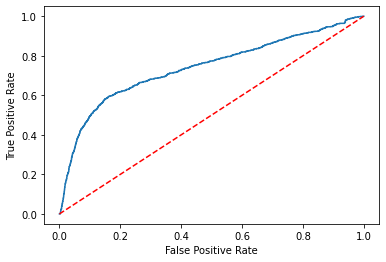

In [53]:
fpr,tpr,threshold=roc_curve(ytest,clf_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='r',ls='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [55]:
roc_auc_score(ytest,clf1.predict_proba(xtest)[:,1])

0.7407834697477403

## Insight:

The accuracy score for Gradient Boost Classifier is 88%.

## XGBoost Classifier

In [61]:
xg =  xgb.XGBClassifier()

In [62]:
xg.fit(xtrain_smote,ytrain_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
y_pred = xg.predict(xtest)

In [90]:
accuracy_score(ytest,y_pred)

0.8938211590124089

In [64]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6898
           1       0.59      0.31      0.41       919

    accuracy                           0.89      7817
   macro avg       0.75      0.64      0.67      7817
weighted avg       0.88      0.89      0.88      7817



C:\Users\kushp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


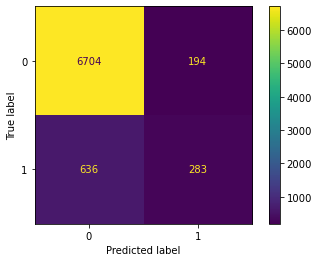

In [91]:
plot_confusion_matrix(xg,xtest,ytest)

## Insight:

The accuracy score for XGBoost Classifier of 89%.

# OVERALL INFERENCE

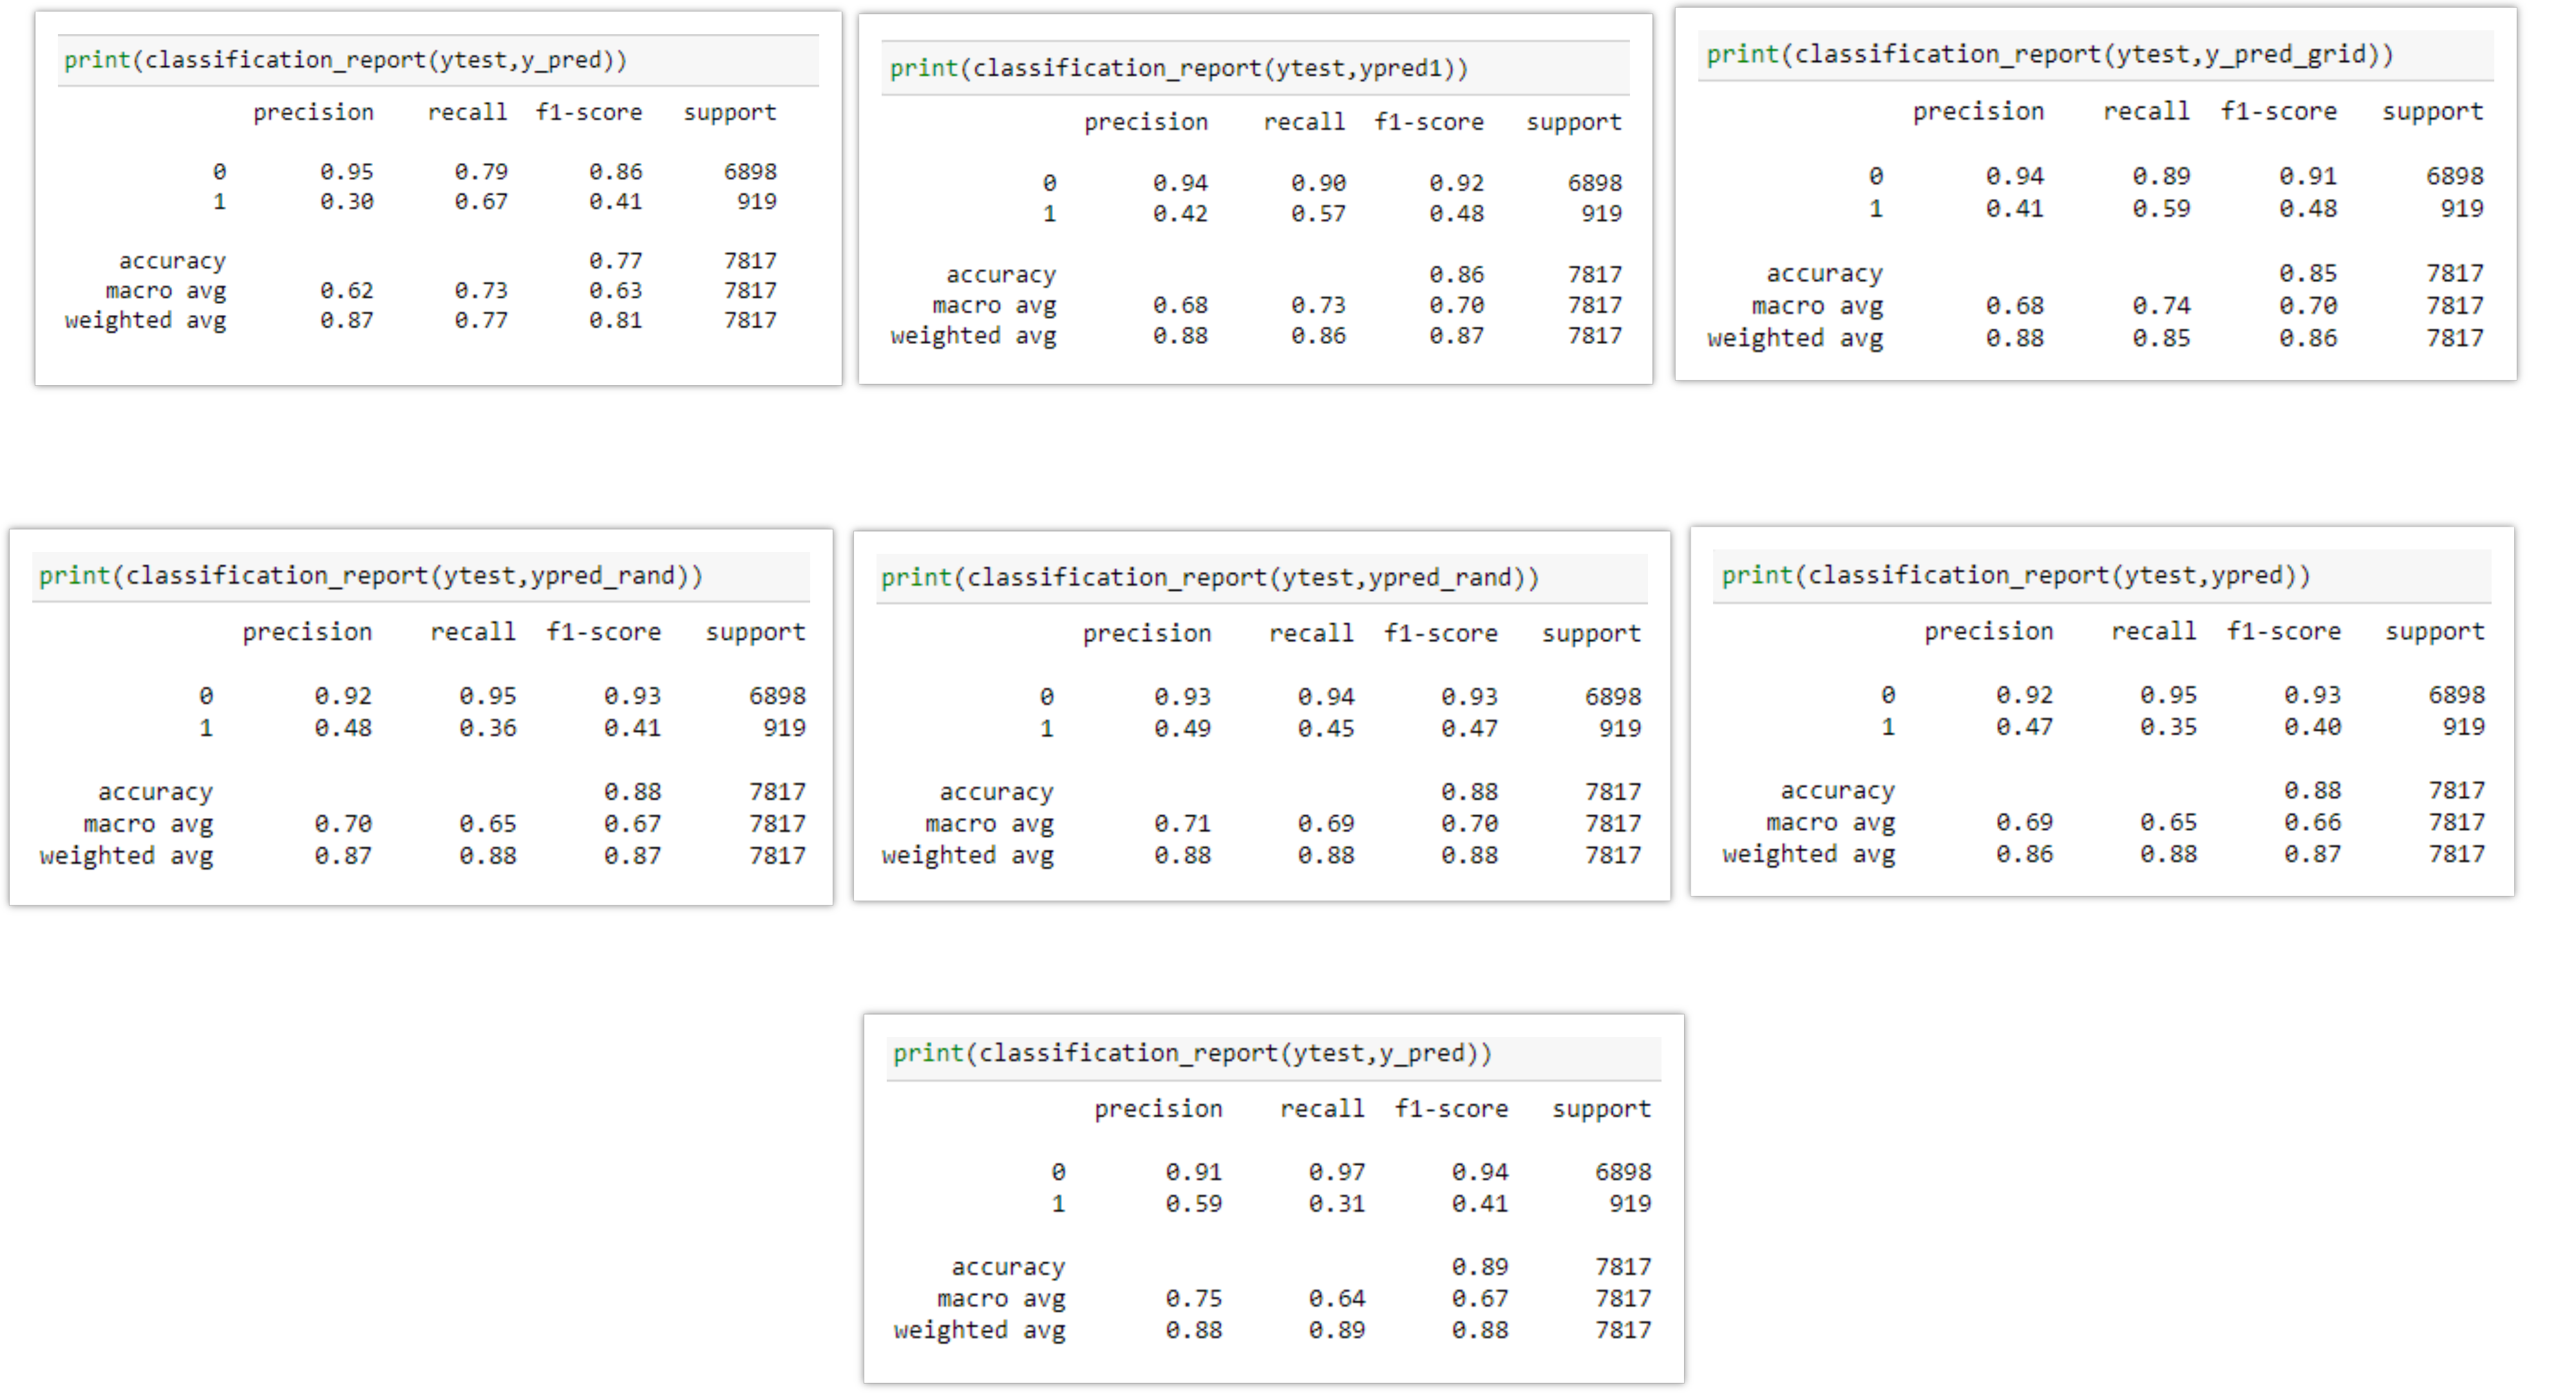

## From the above classification reports and scores we conclude that:

1)The model achieved an accuracy of **89%** for **XGBoosting Classifier Algorithm** and **88%** for **AdaBoost Classifier Algorithm**, which indicates that it performs well at classifying the data.

2)As compared to other models **Logistic Regression Algorithm** achieved an low accuracy of **77%**, which indicates that it performing well above chance of classifying the data.

3)Hence **XGBoosting Classifier Algorithm** and **AdaBoost Classifier Algorithm** giving the better scores in our model.


## From the dataset we understand that:

**Age**, **Job**, **Marital status**, **Education level**, **Credit status**, **Communication preferences** and **Previous marketing campaign outcome**.These factors can be used to develop effective marketing strategies to target customers who are more likely to invest in a term deposit.